In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

# Fibonaccijeva števila

## Analiza paralelnega izračuna Fibonaccijevih števil v odvisnosti od števila domen

In [37]:
df_fib_domains = pd.read_csv('fib_par_domains.csv')

/var/folders/9s/v0gzy6497956yzhn8x7gf8mh0000gn/T/ipykernel_6235/2813857426.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='grey')


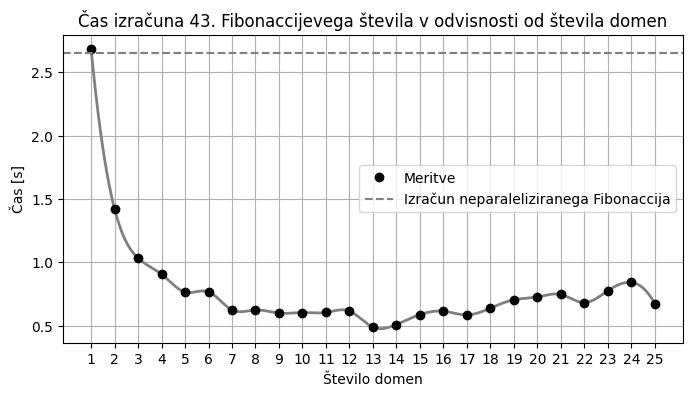

In [38]:
izracun_neparaleliziranega_fibonaccija = 2.65

# Create a new figure
plt.figure(figsize=(8, 4))

# Making the line plot smoother using scipy
xnew = np.linspace(df_fib_domains['num_domains'].min(), df_fib_domains['num_domains'].max(), 500) 
spl = make_interp_spline(df_fib_domains['num_domains'], df_fib_domains['time'], k=3)
power_smooth = spl(xnew)

# Plot the smooth line
plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='grey')

# Plot the data points
plt.plot(df_fib_domains['num_domains'], df_fib_domains['time'], 'ko', label='Meritve')

# Add a straight horizontal line at y=2.9
plt.axhline(y=izracun_neparaleliziranega_fibonaccija, color='grey', linestyle='--', label='Izračun neparaleliziranega Fibonaccija')

# Add title and labels
plt.title('Čas izračuna 43. Fibonaccijevega števila v odvisnosti od števila domen')
plt.xlabel('Število domen')
plt.ylabel('Čas [s]')

# Adjust x-axis to show discrete values
plt.xticks(range(1, 26))

# Adding a grid
plt.grid(True)

# Adding a legend
plt.legend()

plt.savefig('fib_par_v_odvisnosti_od_domen.jpg')

# Display the plot
plt.show()



## Analiza časa izračuna n-tega Fibonaccijevega števila pri fiksnem številu domen

### sequential_threshold = 38

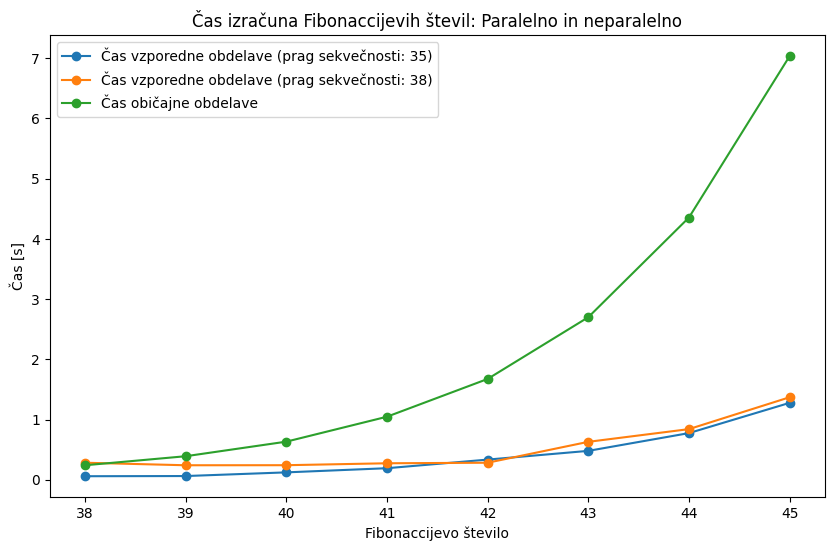

In [39]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('fib_par_n.csv')

# Izlušči stolpce z podatki
fib_number = data['fib_number']
parallel_time_lower_threshold = data['parallel_time_lower_threshold']
parallel_time_upper_threshold = data['parallel_time_upper_threshold']
non_parallel_time = data['non_parallel_time']

# Prilagodi graf
plt.figure(figsize=(10, 6))
plt.plot(fib_number, parallel_time_lower_threshold, marker='o', label='Čas vzporedne obdelave (prag sekvečnosti: 35)')
plt.plot(fib_number, parallel_time_upper_threshold, marker='o', label='Čas vzporedne obdelave (prag sekvečnosti: 38)')
plt.plot(fib_number, non_parallel_time, marker='o', label='Čas običajne obdelave')
plt.xlabel('Fibonaccijevo število')
plt.ylabel('Čas [s]')
plt.title('Čas izračuna Fibonaccijevih števil: Paralelno in neparalelno')
plt.legend()

plt.savefig('fib_par_v_odvisnosti_od_n.jpg')

# Prikaz grafa
plt.show()

